# Exploring Ebay Used Vehicles Data

This project will analyze used vehicles data from eBay Kleinanzeigen (eBay Germany). The dataset was originally scraped (March, 5, 2016 through April, 7, 2016) and uploaded to  <a href="https://www.kaggle.com/orgesleka/used-cars-database/data">Kaggle</a>. The data contains several variables describing features about the vehicle in the ad (e.g., model, gas type, kilometers driven, etc), and variables about the website (e.g., type of seller, type of listing, number of pictures in the ad, etc). Here is the data dictionary associated with the data:

 - __dateCrawled:__ When this ad was first crawled. All field-values are taken from this date.
 - __name:__  Name of the car.
 - __seller:__ Whether the seller is private or a dealer.
 - __offerType :__ The type of listing
 - __price:__ The price on the ad to sell the car.
 - __abtest:__ Whether the listing is included in an A/B test.
 - __vehicleType:__ The vehicle Type.
 - __yearOfRegistration:__ The year in which the car was first registered.
 - __gearbox:__ The transmission type.
 - __powerPS:__ The power of the car in PS.
 - __model:__ The car model name.
 - __kilometer:__ How many kilometers the car has driven.
 - __monthOfRegistration:__ The month in which the car was first registered.
 - __fuelType:__ What type of fuel the car uses.
 - __brand:__ The brand of the car.
 - __notRepairedDamage:__ If the car has a damage which is not yet repaired.
 - __dateCreated:__ The date on which the eBay listing was created.
 - __nrOfPictures:__ The number of pictures in the ad.
 - __postalCode:__ The postal code for the location of the vehicle.
 - __lastSeenOnline:__ When the crawler saw this ad last online.


# Objective
The aim of this project is to clean the data and analyze the included used car listings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import folium
pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
autos = pd.read_csv("autos.csv", encoding="Latin-1")

In [3]:
# There shouldn't be duplicates given each row represents one unique ad. 
autos[autos.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

The dataset has __50.000__ entires and is fromed by __20__ columns (Types: int64 and object)

In [6]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [7]:
autos["notRepairedDamage"].value_counts()

nein    35232
ja       4939
Name: notRepairedDamage, dtype: int64

- Columns like dateCrawled, dateCreated and lastSeen are __object__ type, but should be __datetime__ type. To work easier with them.
- Columns like vechicleType, gearbox, model or notRepairedDamage have missing values for some entries.
- Columns like price or odometer have special characters ($, km)
- Columns like notRepairedDamage contain German words (nein - no, ja - yes)

## Cleaning the Data

In [8]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [9]:
columns_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [10]:
autos.columns = columns_names 
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


To make the dataset more understandable some some columns needed a name change.

And all the columns were changed from camelcase to snakecase following the Python standards

In [11]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-16 21:50:53,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [12]:
autos.describe()

,registration_year,power_ps,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [13]:
autos["nr_of_pictures"].value_counts()

0    50000
Name: nr_of_pictures, dtype: int64

In [14]:
autos.drop(["nr_of_pictures"], axis = 1, inplace = True)

The column __nr_of_pictures__ is dropped because contais only one value __0__, which doesn't give any information.

In [15]:
autos[["price", "odometer"]]

,price,odometer
0,"$5,000","150,000km"
1,"$8,500","150,000km"
2,"$8,990","70,000km"
3,"$4,350","70,000km"
4,"$1,350","150,000km"
...,...,...
49995,"$24,900","100,000km"
49996,"$1,980","150,000km"
49997,"$13,200","5,000km"
49998,"$22,900","40,000km"


The columns __seller__ and __offer_type__ have the same values.
The columns __price__ and __odometer__ can be converted to numeric types.

In [16]:
autos["price"].head(5)

0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
Name: price, dtype: object

In [16]:
autos["price"] = autos["price"].str.replace("$", "")
autos["price"] = autos["price"].str.replace(",", "").astype(int)


In [17]:
autos["odometer"].head(5)

0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer, dtype: object

In [18]:
autos["odometer"] = autos["odometer"].str.replace("km", "")
autos["odometer"] = autos["odometer"].str.replace(",", "")
autos["odometer"].astype(int)
autos = autos.rename(columns={'odometer': 'odometer_km'})

In [19]:
autos["price"].unique().shape

(2357,)

In [20]:
autos["odometer_km"].unique().shape

(13,)

In [21]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [22]:
autos["odometer_km"].describe()

count      50000
unique        13
top       150000
freq       32424
Name: odometer_km, dtype: object

In [23]:
autos["price"].value_counts().sort_index(ascending=False).head()

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
Name: price, dtype: int64

In [24]:
autos["odometer_km"].value_counts().sort_index(ascending=False)

90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
150000    32424
125000     5170
100000     2169
10000       264
Name: odometer_km, dtype: int64

Knowing that eBay is an auction website, it is possible to have these low values in the price column. Several of these entries appear to be illegitimate entries (e.g., 1234566, 12345678, 1111111, 99999999). In addition, it is unlikely that these prices represent the value of the vehicles given that this is a used vehicle classified site. Therefore, anything below __1.00__ and above __350.000__ will be removed as these could have been errors or illegitimate entries.

For the odometer column, the distribution of kilometers is skewed towards the high end. Perhaps this suggests that many of these vehicles are classics, or that people want to sell their vehicles for used parts.

In [25]:
autos = autos[(autos.loc[:, "price"] > 0) & (autos.loc[:, "price"] <= 350000)]
autos["price"].value_counts().head(5)

500     781
1500    734
2500    643
1200    639
1000    639
Name: price, dtype: int64

In [26]:
autos["odometer_km"].describe()

count      48565
unique        13
top       150000
freq       31414
Name: odometer_km, dtype: object

In [27]:
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

In [28]:
autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

The __date_crawled__ column range goes from 2016-04-05 to 2016-04-07

In [29]:
autos["ad_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

The __ad_created__ range goes from 2015-06-11 to 2016-04-07

In [30]:
autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

The __last_seen__ range goes from 2016-03-05 to 2016-04-07

In [31]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [32]:
autos["registration_year"].head(5)

0    2004
1    1997
2    2009
3    2007
4    2003
Name: registration_year, dtype: int64

The highest registration year acceptable: 2016 (current year of creation of the dataset)
The lowest registration year acceptable: 1990  (when first cars where made)

In [34]:
autos.drop(autos[(autos["registration_year"] < 1940) | (autos["registration_year"] > 2016)].index, inplace=True)

In [35]:
autos["registration_year"].describe()

count    46665.000000
mean      2002.936826
std          7.043626
min       1941.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

In [36]:
autos["registration_year"].value_counts(normalize=True)

2000    0.067631
2005    0.062917
1999    0.062081
2004    0.057923
2003    0.057838
          ...   
1941    0.000043
1948    0.000021
1943    0.000021
1953    0.000021
1952    0.000021
Name: registration_year, Length: 70, dtype: float64

In [37]:
autos.isnull().sum()

date_crawled             0
name                     0
seller                   0
offer_type               0
price                    0
abtest                   0
vehicle_type          2700
registration_year        0
gearbox               2103
power_ps                 0
model                 2185
odometer_km              0
registration_month       0
fuel_type             3312
brand                    0
unrepaired_damage     8299
ad_created               0
postal_code              0
last_seen                0
dtype: int64

The columns entries: __vehicle_type (2700)__, __gearbox (2103)__, __model (2185)__, __fuel_type (3312)__, __unrepaired_damage (8299)__ with null values.

In [38]:
autos["brand"].nunique()

40

In [39]:
autos["brand"].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [40]:
autos["vehicle_type"].nunique()

8

In [41]:
autos["vehicle_type"].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

There are __8__ vehicle types (nan value included) and __40__ vehicle brands. 

In [42]:
autos["name"].nunique()

35801

In [43]:
autos["name"].unique()

array(['Peugeot_807_160_NAVTECH_ON_BOARD',
       'BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik',
       'Volkswagen_Golf_1.6_United', ...,
       'Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon',
       'Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+Reifen_neu_!!',
       'Fiat_500_C_1.2_Dualogic_Lounge'], dtype=object)

In [44]:
words_dictionary = {"privat": "private", "gewerblich": "commercial", "Angebot": "bid", "Gesuch": "application", "kleinwagen": 
            "super mini", "kombi":"station wagon", "cabrio": "convertible", "limousine": "sedan", "andere": "other", "manuell": "manual", "automatik": 
            "automatic", "benzin":"gas", "elektro": "electric", "sonstige_auto": "other", "sonstige_autos": "other", "nein": "no", "ja": "yes"}

def translate(value):
    if value in words_dictionary:
        return words_dictionary[value]
    else:
        return value
    
columns_to_change = ["seller", "offer_type", "vehicle_type", "gearbox", "model", "fuel_type", "brand", "unrepaired_damage"]
autos[columns_to_change] = autos[columns_to_change].applymap(translate)

After translating German names to English, in the column __names__ appears to contain __vehicle_type__ values.

In [46]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
# Used str.contains as a make-shift boolean index, hence disabling the warnings. 

In [47]:
# Replaced null values in vehicle type based word matches in name 
autos.loc[autos["name"].str.contains(r"(.*kombi)", case = False), "vehicle_type"] = "station wagon"
autos.loc[autos["name"].str.contains(r"(.*cabrio)", case = False), "vehicle_type"] = "convertible"
autos.loc[autos["name"].str.contains(r"(.*klein)", case = False), "vehicle_type"] = "small car"
autos.loc[autos["name"].str.contains(r"(.*limo[^n])", case = False), "vehicle_type"] = "sedan"
autos.loc[autos["name"].str.contains(r"(.*coupe)", case = False), "vehicle_type"] = "coupe"
autos.loc[autos["name"].str.contains(r"(.*bus)", case = False), "vehicle_type"] = "bus"
autos.loc[autos["name"].str.contains(r"(.*caravan)", case = False), "vehicle_type"] = "van"
# Multiple instances where there could be multiple vehicle type keywords in a string. Thus, "smart car" was replaced to "small car" last
# to reverse some of these cleaning induced errors.
autos.loc[autos["name"].str.contains(r"(.*smart)", case = False), "vehicle_type"] = "small car"

In [48]:
# Reactivated filtering warnings
import warnings
warnings.filterwarnings("default", 'This pattern has match groups')

In [49]:
autos.isnull().sum()

date_crawled             0
name                     0
seller                   0
offer_type               0
price                    0
abtest                   0
vehicle_type          2493
registration_year        0
gearbox               2103
power_ps                 0
model                 2185
odometer_km              0
registration_month       0
fuel_type             3312
brand                    0
unrepaired_damage     8299
ad_created               0
postal_code              0
last_seen                0
dtype: int64

The __null__ values from the __vehicle_type__ column where reduced from __2700__ to __2493__.

In [50]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'postal_code', 'last_seen'],
      dtype='object')

In [51]:
autos["brand"].value_counts().head(20).index

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai', 'other', 'volvo', 'mini'],
      dtype='object')

After seeing the value counts of the brand column, 
I decided to agrregate the first __20 brands__ of the value counts index which are the ones whith more percentage of the total value.

In [52]:
date_columns = ['date_crawled', 'ad_created', 'last_seen']
for column in date_columns:
    autos[column] = pd.to_datetime(autos[column], format='%Y%m%d %H:%M:%S.%f')
    autos[column] = autos[column].dt.strftime("%Y%m%d").astype(int)
autos[date_columns]

,date_crawled,ad_created,last_seen
0,20160326,20160326,20160406
1,20160404,20160404,20160406
2,20160326,20160326,20160406
3,20160312,20160312,20160315
4,20160401,20160401,20160401
...,...,...,...
49995,20160327,20160327,20160401
49996,20160328,20160328,20160402
49997,20160402,20160402,20160404
49998,20160308,20160308,20160405


## Data Analysis

In [53]:
# Brands list
brands = [ 'volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai', 'sonstige_autos', 'volvo', 'mini']

In [54]:
# Creates the mean price of a concrete brand
autos[autos["brand"] == 'volkswagen']["price"].mean()

5402.410261610221

In [55]:
# Import packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#Brands dict
brands_dict = {}
for brand in brands:
    brands_dict[brand] = autos[autos["brand"] == brand]["price"].mean()

brands_dict

{'volkswagen': 5402.410261610221,
 'bmw': 8332.203855140187,
 'opel': 2976.2472604104405,
 'mercedes_benz': 8629.300755219901,
 'audi': 9336.687453600594,
 'ford': 3737.2757668711656,
 'renault': 2475.7172727272728,
 'peugeot': 3094.0172290021537,
 'fiat': 2813.748538011696,
 'seat': 4397.230949589683,
 'skoda': 6368.0,
 'nissan': 4743.40252454418,
 'mazda': 4112.596614950635,
 'smart': 3580.2239031770046,
 'citroen': 3779.1391437308866,
 'toyota': 5167.091062394604,
 'hyundai': 5365.254273504273,
 'sonstige_autos': nan,
 'volvo': 4946.501170960188,
 'mini': 10613.459657701711}

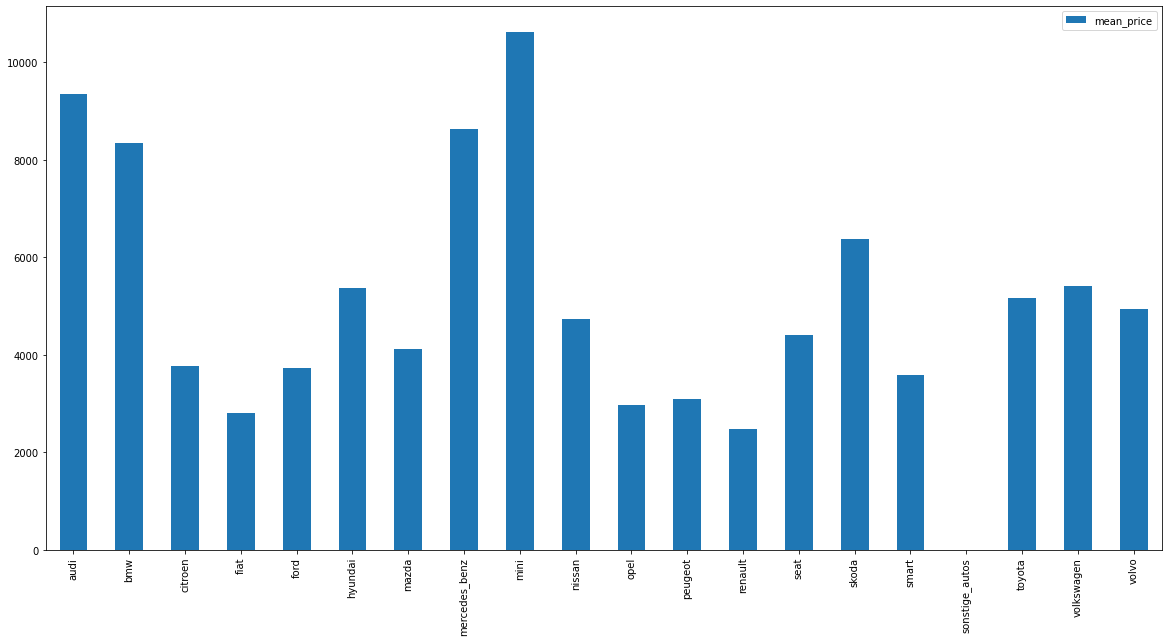

In [57]:
lists = sorted(brands_dict.items())
x, y = zip(*lists)
df = pd.DataFrame(index=x)
df["mean_price"] = y
df.plot.bar(figsize=(20, 10))

In [58]:
brand_values_count = autos["brand"].value_counts().head(20)
brand_values_count

volkswagen       9862
bmw              5136
opel             5019
mercedes_benz    4502
audi             4041
ford             3260
renault          2200
peugeot          1393
fiat             1197
seat              853
skoda             766
nissan            713
mazda             709
smart             661
citroen           654
toyota            593
hyundai           468
other             452
volvo             427
mini              409
Name: brand, dtype: int64

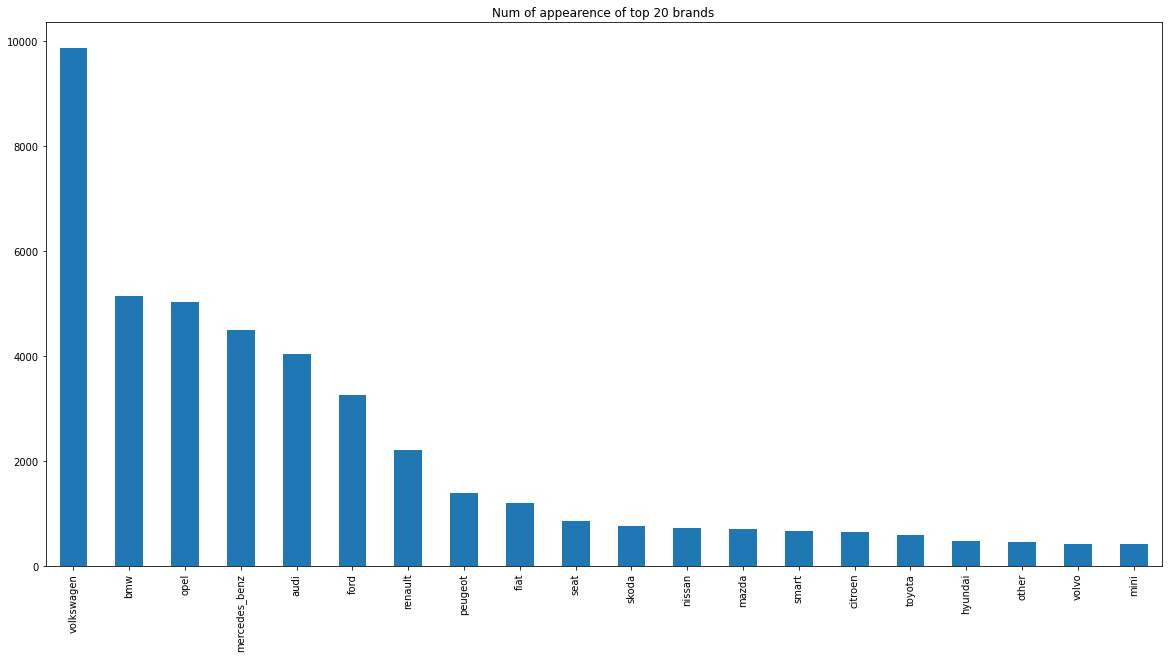

In [59]:
brand_values_count.plot(figsize=(20, 10), kind='bar', title='Num of appearence of top 20 brands')

As we can see in the previous list the car whith __higher mean price__ is
is __Audi__.

__Volkswagen__ is the car bran with more appearances and has a lower price than Audi. That may be an indicator that Volkswagen combines quality & price.

In [60]:
# Only top 6 brands
brands = ["audi", "bmw", "ford", "mercedes_benz", "opel", "volkswagen"]
autos[autos["brand"].isin(brands)]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,private,bid,8500,control,sedan,1997,automatic,286,7er,150000,6,gas,bmw,no,20160404,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,private,bid,8990,test,sedan,2009,manual,102,golf,70000,7,gas,volkswagen,no,20160326,35394,20160406
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,private,bid,1350,test,station wagon,2003,manual,0,focus,150000,7,gas,ford,no,20160401,39218,20160401
6,20160320,VW_Golf_III_GT_Special_Electronic_Green_Metall...,private,bid,300,test,sedan,1995,manual,90,golf,150000,8,gas,volkswagen,NaN,20160320,31535,20160323
7,20160316,Golf_IV_1.9_TDI_90PS,private,bid,1990,control,sedan,1998,manual,90,golf,150000,12,diesel,volkswagen,no,20160316,53474,20160407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,20160322,Audi_A6__S6__Avant_4.2_quattro_eventuell_Tausc...,private,bid,5000,control,station wagon,2001,automatic,299,a6,150000,1,gas,audi,no,20160322,46537,20160406
49995,20160327,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,private,bid,24900,control,sedan,2011,automatic,239,q5,100000,1,diesel,audi,no,20160327,82131,20160401
49996,20160328,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,private,bid,1980,control,convertible,1996,manual,75,astra,150000,5,gas,opel,no,20160328,44807,20160402
49998,20160308,Audi_A3_2.0_TDI_Sportback_Ambition,private,bid,22900,control,station wagon,2013,manual,150,a3,40000,11,diesel,audi,no,20160308,35683,20160405


In [61]:
price_dict = {}
for brand in brands:
    price_dict[brand] = autos[autos["brand"] == brand]["price"].mean()

price_dict

{'audi': 9336.687453600594,
 'bmw': 8332.203855140187,
 'ford': 3737.2757668711656,
 'mercedes_benz': 8629.300755219901,
 'opel': 2976.2472604104405,
 'volkswagen': 5402.410261610221}

In [62]:
autos["odometer_km"]  = autos["odometer_km"].astype(float)
mileage_dict = {}
for brand in brands:
    mileage_dict[brand] = autos[autos["brand"] == brand]["odometer_km"].mean()    
mileage_dict

{'audi': 129157.38678544914,
 'bmw': 132597.35202492212,
 'ford': 124374.23312883436,
 'mercedes_benz': 130816.30386494892,
 'opel': 129336.5212193664,
 'volkswagen': 128707.15879132022}

In [63]:
autos["odometer_km"]

0        150000.0
1        150000.0
2         70000.0
3         70000.0
4        150000.0
           ...   
49995    100000.0
49996    150000.0
49997      5000.0
49998     40000.0
49999    150000.0
Name: odometer_km, Length: 46665, dtype: float64

In [64]:
price_series = pd.Series(price_dict)
price_series

audi             9336.687454
bmw              8332.203855
ford             3737.275767
mercedes_benz    8629.300755
opel             2976.247260
volkswagen       5402.410262
dtype: float64

In [65]:
mileage_series = pd.Series(mileage_dict)
mileage_series

audi             129157.386785
bmw              132597.352025
ford             124374.233129
mercedes_benz    130816.303865
opel             129336.521219
volkswagen       128707.158791
dtype: float64

In [66]:
df = pd.DataFrame(price_series, columns=['mean_price'])
df

,mean_price
audi,9336.687454
bmw,8332.203855
ford,3737.275767
mercedes_benz,8629.300755
opel,2976.247260
volkswagen,5402.410262


In [67]:
df["mileage"] = mileage_series
df

,mean_price,mileage
audi,9336.687454,129157.386785
bmw,8332.203855,132597.352025
ford,3737.275767,124374.233129
mercedes_benz,8629.300755,130816.303865
opel,2976.247260,129336.521219
volkswagen,5402.410262,128707.158791


Text(0, 0.5, 'Mile age in km')

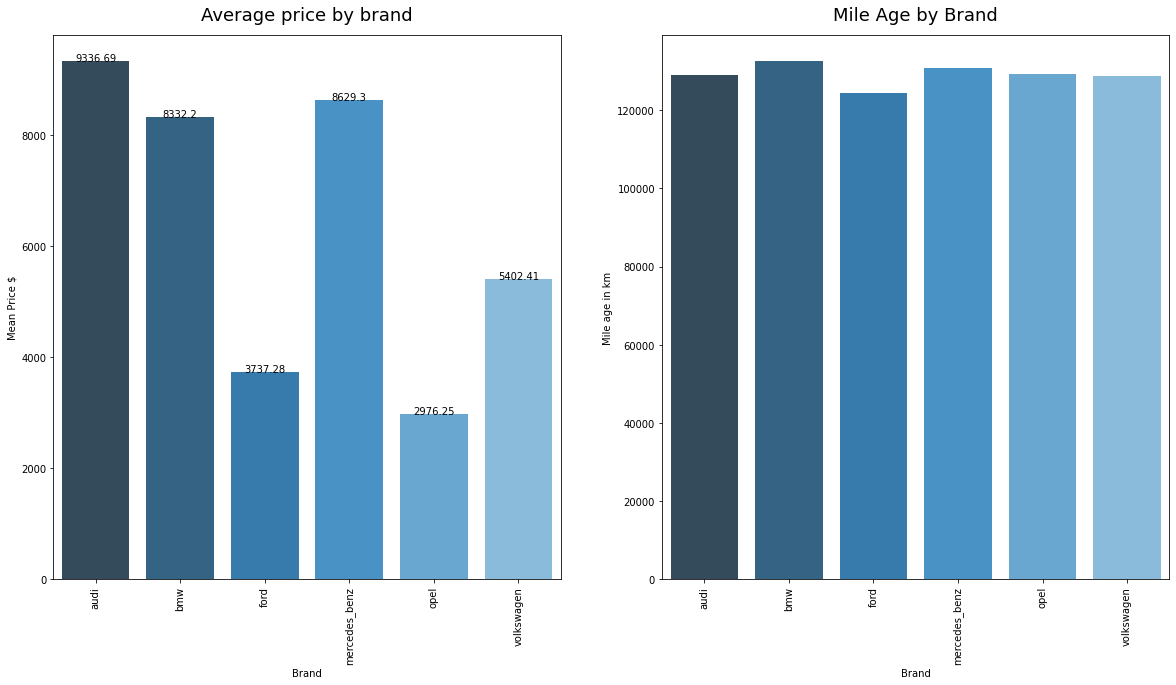

In [68]:
fig = plt.figure(figsize =(20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bar_plot = sns.barplot(x=df.index, y = df['mean_price'], dodge = False, ax = ax1,
            saturation = 1, palette = "Blues_d")

idx = 0
for index in df.index:     
    bar_plot.text(idx, df.loc[index, 'mean_price'], round(df.loc[index, 'mean_price'], 2), color='black', ha='center')
    idx += 1
    
ax1.set_title("Average price by brand", fontsize = 18, pad = 15)
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel("Brand")
ax1.set_ylabel("Mean Price $")

sns.barplot(x=df.index, y = df['mileage'], dodge = False, ax = ax2,
            saturation = 1, palette = "Blues_d")

ax2.set_title("Mile Age by Brand", fontsize = 18, pad = 15)
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel("Brand")
ax2.set_ylabel("Mile age in km")


So, as we see in the charts above, __Audi__ is the brand with biggest average price, but is only the second with biggest mean in mileage. That means that users doesn't spend a bigger amount on the vehicle cause it's resistence and persistence in time. This established a strong user behavior towards the brand value than any other factor. As we can see the foreign car brands like __Ford__ have a high mile age and a lower price, but doesn't have the same reputation like the national brands.

### Model and brand analysis

In [69]:
autos.model.value_counts()

golf          3707
other         3367
3er           2615
polo          1609
corsa         1591
              ... 
kappa            2
200              1
rangerover       1
b_max            1
i3               1
Name: model, Length: 244, dtype: int64

In [70]:
autos.model.nunique()

244

There are __244__ car models.

In [71]:
top_models_by_brand = autos.groupby(["brand", "model"]).size().reset_index().rename(columns=({0: 'model_count'})).sort_values(by = 'model_count', ascending=False)
top_models_by_brand.head(10)

,brand,model,model_count
266,volkswagen,golf,3707
23,bmw,3er,2615
273,volkswagen,polo,1609
181,opel,corsa,1591
271,volkswagen,passat,1349
178,opel,astra,1348
13,audi,a4,1231
140,mercedes_benz,c_klasse,1136
24,bmw,5er,1132
143,mercedes_benz,e_klasse,958


The top __10 models__ pertain to the top __5 national brand__ cars. The most aucctioned model is __Volkswagen Golf_.

In [72]:
# Add percentage of the model overall
size = len(autos)
top_models_by_brand["overall_percentage"] =  ((top_models_by_brand["model_count"] / size) * 100).astype(int)
top_models_by_brand

,brand,model,model_count,overall_percentage
266,volkswagen,golf,3707,7
23,bmw,3er,2615,5
273,volkswagen,polo,1609,3
181,opel,corsa,1591,3
271,volkswagen,passat,1349,2
...,...,...,...,...
212,rover,discovery,1,0
215,rover,rangerover,1,0
77,ford,b_max,1,0
27,bmw,i3,1,0


In [73]:
for brand in top_models_by_brand["brand"]:
    total_count = top_models_by_brand[top_models_by_brand["brand"] == brand]["model_count"].sum()
    for model in top_models_by_brand[top_models_by_brand["brand"] == brand]["model"]:
        condition = (top_models_by_brand["brand"] == brand) & (top_models_by_brand["model"] == model) 
        model_count = top_models_by_brand[condition]["model_count"]        
        top_models_by_brand.loc[condition, "brand_percentage"] = (model_count / total_count * 100)
top_models_by_brand       

,brand,model,model_count,overall_percentage,brand_percentage
266,volkswagen,golf,3707,7,39.082762
23,bmw,3er,2615,5,53.161212
273,volkswagen,polo,1609,3,16.963627
181,opel,corsa,1591,3,32.905895
271,volkswagen,passat,1349,2,14.222457
...,...,...,...,...,...
212,rover,discovery,1,0,1.694915
215,rover,rangerover,1,0,1.694915
77,ford,b_max,1,0,0.031969
27,bmw,i3,1,0,0.020329


In [74]:
top_ten_models = top_models_by_brand.head(10)
top_ten_models

,brand,model,model_count,overall_percentage,brand_percentage
266,volkswagen,golf,3707,7,39.082762
23,bmw,3er,2615,5,53.161212
273,volkswagen,polo,1609,3,16.963627
181,opel,corsa,1591,3,32.905895
271,volkswagen,passat,1349,2,14.222457
178,opel,astra,1348,2,27.880041
13,audi,a4,1231,2,31.355069
140,mercedes_benz,c_klasse,1136,2,25.947921
24,bmw,5er,1132,2,23.012807
143,mercedes_benz,e_klasse,958,2,21.882138


In the previous list we can see the top __10__ models, their __brand_percentage__ and theis __overall_percentage__

In [75]:
for model in top_ten_models['model']:    
    top_ten_models.loc[top_ten_models['model'] == model, 'price_mean'] = autos.loc[autos['model'] == model, 'price'].mean()
    top_ten_models.loc[top_ten_models['model'] == model, 'non_damaged_price_mean'] = autos.loc[(autos['model'] == model) & (autos['unrepaired_damage'] == 'no'), 'price'].mean()
    top_ten_models.loc[top_ten_models['model'] == model, 'damaged_price_mean'] = autos.loc[(autos['model'] == model) & (autos['unrepaired_damage'] == 'yes'), 'price'].mean()
    top_ten_models.loc[top_ten_models['model'] == model, 'odometer_mean'] = autos.loc[autos['model'] == model, 'odometer_km'].mean()
    top_ten_models.loc[top_ten_models['model'] == model, 'automatic_price_mean'] = autos.loc[(autos['model'] == model) & (autos['gearbox'] == 'automatic'), 'price'].mean()
    top_ten_models.loc[top_ten_models['model'] == model, 'manual_price_mean'] = autos.loc[(autos['model'] == model) & (autos['gearbox'] == 'manual'), 'price'].mean()
    
top_ten_models

,brand,model,model_count,overall_percentage,brand_percentage,price_mean,non_damaged_price_mean,damaged_price_mean,odometer_mean,automatic_price_mean,manual_price_mean
266,volkswagen,golf,3707,7,39.082762,5081.579984,6092.488416,1850.156352,128048.287025,10045.639080,4535.180707
23,bmw,3er,2615,5,53.161212,6001.792734,6940.567988,2325.630841,137305.927342,9897.590494,5026.241725
273,volkswagen,polo,1609,3,16.963627,2593.383468,3208.581181,1014.079545,127445.618397,5861.103448,2534.822417
181,opel,corsa,1591,3,32.905895,1877.371464,2273.826590,1182.610778,128447.517285,1597.149254,1943.100346
271,volkswagen,passat,1349,2,14.222457,4948.300964,5820.326154,2183.734513,139725.722758,7473.395105,4314.575906
178,opel,astra,1348,2,27.880041,3312.467359,3964.168737,1314.605634,131131.305638,2778.833333,3405.349418
13,audi,a4,1231,2,31.355069,7049.138099,8175.672451,2943.366337,136242.891958,9359.587248,6494.253409
140,mercedes_benz,c_klasse,1136,2,25.947921,7046.848592,7746.407080,3739.635135,129757.922535,9468.483168,5142.145215
24,bmw,5er,1132,2,23.012807,7984.825088,8882.866197,3926.722772,140764.134276,10378.409091,4968.230126
143,mercedes_benz,e_klasse,958,2,21.882138,8090.259916,9265.728169,4427.341772,136790.187891,9483.883523,4251.722689


In the table above the top ten models are shown, with their price mean, as well as the price mean if are damaged or not. Some conlcusions can be extracted:
- First models have a a __high__ odometer_mean and a __normal/low__ price mean.
- Repaired cars are cheeper that the not damaged ones. 
- Cars with an automatic __gearbox__ tend to have a price higher (near the double), than __manuals__. 

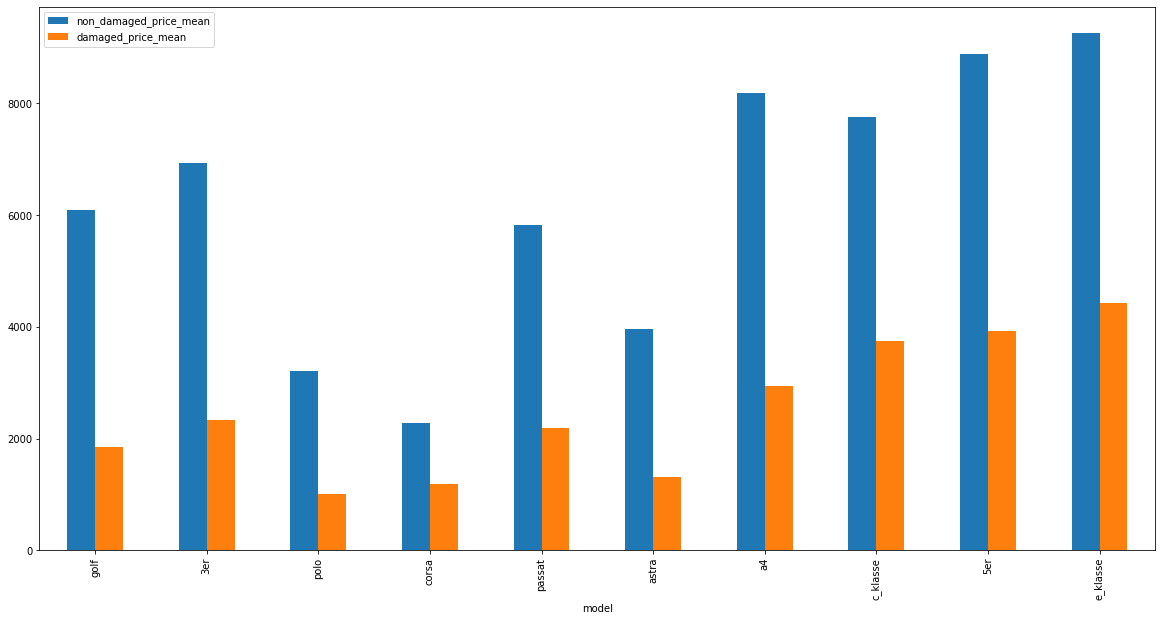

In [76]:
top_ten_models[["model", "non_damaged_price_mean", "damaged_price_mean"]].plot(x='model', kind='bar', figsize=(20, 10))

In the previous chart is shown how much-damaged cars price is reduced in comparison with the not damaged of each model in the list of the __Top 10 models__.

In [77]:
for model in top_ten_models['model']: 
    model_count = top_ten_models.loc[top_ten_models['model'] == model]['model_count']
    damaged_cars = len(autos.loc[(autos['model'] == model) & (autos['unrepaired_damage'] == 'yes')])
    damaged_cars_with_manual_gearbox = len(autos.loc[(autos['model'] == model) & (autos['unrepaired_damage'] == 'yes') & ((autos['gearbox'] == 'manual'))])
    damaged_cars_with_automatic_gearbox = len(autos.loc[(autos['model'] == model) & (autos['unrepaired_damage'] == 'yes') & ((autos['gearbox'] == 'automatic'))])
    
    automatic_gearbox = len(autos.loc[(autos['model'] == model) & ((autos['gearbox'] == 'automatic'))])
    manual_gearbox = len(autos.loc[(autos['model'] == model) & ((autos['gearbox'] == 'manual'))])
    
    top_ten_models.loc[top_ten_models['model'] == model, 'manual_gearbox_pecentage'] = (manual_gearbox / model_count) * 100
    top_ten_models.loc[top_ten_models['model'] == model, 'automatic_gearbox_percenage'] = (automatic_gearbox / model_count) * 100
    top_ten_models.loc[top_ten_models['model'] == model, 'damaged_pecentage'] = (damaged_cars / model_count) * 100
    top_ten_models.loc[top_ten_models['model'] == model, 'manual_gearbox_damaged_pecentage'] = (damaged_cars_with_manual_gearbox / manual_gearbox) * 100
    top_ten_models.loc[top_ten_models['model'] == model, 'automatic_gearbox_damaged_pecentage'] = (damaged_cars_with_automatic_gearbox / automatic_gearbox) * 100
    
top_ten_models

,brand,model,model_count,overall_percentage,brand_percentage,price_mean,non_damaged_price_mean,damaged_price_mean,odometer_mean,automatic_price_mean,manual_price_mean,manual_gearbox_pecentage,automatic_gearbox_percenage,damaged_pecentage,manual_gearbox_damaged_pecentage,automatic_gearbox_damaged_pecentage
266,volkswagen,golf,3707,7,39.082762,5081.579984,6092.488416,1850.156352,128048.287025,10045.639080,4535.180707,83.895333,11.734556,8.281629,8.520900,7.356322
23,bmw,3er,2615,5,53.161212,6001.792734,6940.567988,2325.630841,137305.927342,9897.590494,5026.241725,76.252390,20.917782,8.183556,9.077232,5.667276
273,volkswagen,polo,1609,3,16.963627,2593.383468,3208.581181,1014.079545,127445.618397,5861.103448,2534.822417,92.044748,3.604723,10.938471,10.735989,13.793103
181,opel,corsa,1591,3,32.905895,1877.371464,2273.826590,1182.610778,128447.517285,1597.149254,1943.100346,90.823382,4.211188,10.496543,10.034602,19.402985
271,volkswagen,passat,1349,2,14.222457,4948.300964,5820.326154,2183.734513,139725.722758,7473.395105,4314.575906,75.685693,21.200890,8.376575,8.716944,7.692308
178,opel,astra,1348,2,27.880041,3312.467359,3964.168737,1314.605634,131131.305638,2778.833333,3405.349418,89.169139,6.676558,10.534125,10.399334,14.444444
13,audi,a4,1231,2,31.355069,7049.138099,8175.672451,2943.366337,136242.891958,9359.587248,6494.253409,71.486596,24.207961,8.204712,8.181818,9.395973
140,mercedes_benz,c_klasse,1136,2,25.947921,7046.848592,7746.407080,3739.635135,129757.922535,9468.483168,5142.145215,53.345070,44.454225,6.514085,7.095710,6.138614
24,bmw,5er,1132,2,23.012807,7984.825088,8882.866197,3926.722772,140764.134276,10378.409091,4968.230126,42.226148,56.360424,8.922261,11.715481,7.053292
143,mercedes_benz,e_klasse,958,2,21.882138,8090.259916,9265.728169,4427.341772,136790.187891,9483.883523,4251.722689,24.843424,73.486430,8.246347,10.924370,7.386364


Text(0, 0.5, 'Damaged Percentage')

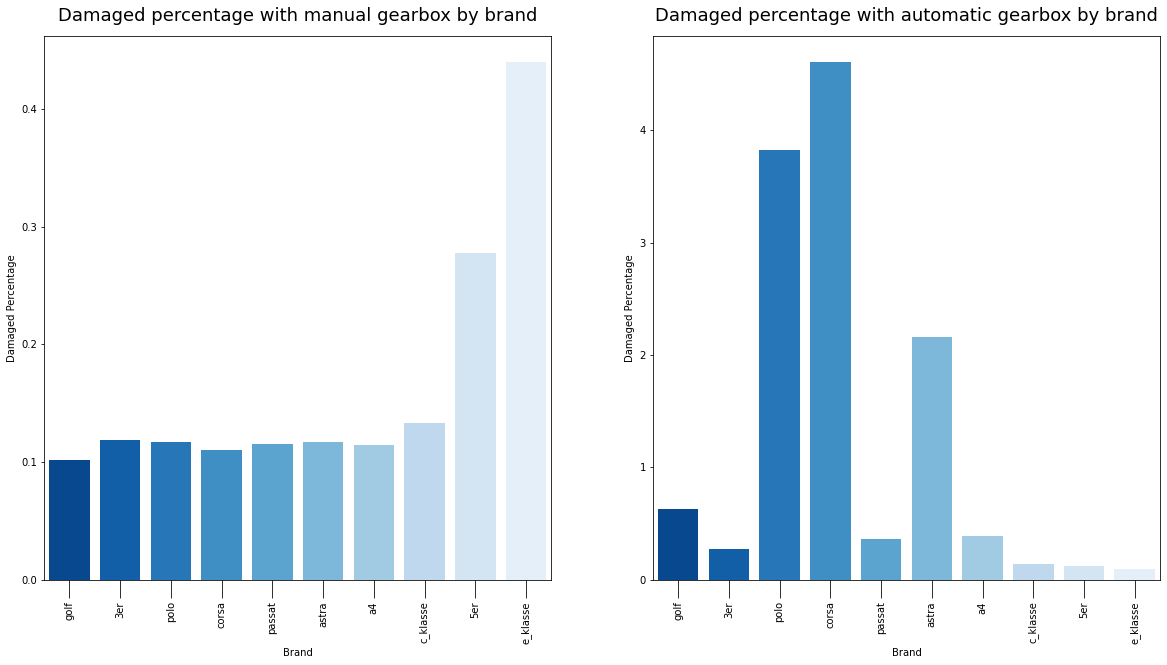

In [78]:
fig = plt.figure(figsize =(20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bar_plot = sns.barplot(x='model', y =(top_ten_models['manual_gearbox_damaged_pecentage'] / top_ten_models['manual_gearbox_pecentage']), data=top_ten_models, dodge = False, ax = ax1,
            saturation = 1, palette = "Blues_r")
    
ax1.set_title("Damaged percentage with manual gearbox by brand", fontsize = 18, pad = 15)
ax1.tick_params(axis='x', labelrotation=90, size=18)
ax1.set_xlabel("Brand")
ax1.set_ylabel("Damaged Percentage")

bar_plot = sns.barplot(x='model', y =(top_ten_models['automatic_gearbox_damaged_pecentage'] / top_ten_models['automatic_gearbox_percenage']), data=top_ten_models, dodge = False, ax = ax2,
            saturation = 1, palette = "Blues_r")
    
ax2.set_title("Damaged percentage with automatic gearbox by brand", fontsize = 18, pad = 15)
ax2.tick_params(axis='x', labelrotation=90, size=18)
ax2.set_xlabel("Brand")
ax2.set_ylabel("Damaged Percentage")


The previous plots is taken into consideration the total damaged percentage of each model in the __Top 10 models list__. Distinguishing if the model had a manual or an automatic gearbox.

As is shown, the total percentage of damaged cars with an automatic gearbox is higher than the total percentage of cars damaged with a manual gearbox.

For example, __Volkswagen Golf__ is the model with more value counts.
 - __Volkswagen Golf__ has 84% of the models with a manual gearbox.
 - __Volkswagen Golf__ has 12% of the models with an automatic gearbox.
 - The other 4% where null values of the column gearbox.
 - __Volkswagen Golf__ has __3707__ value counts. Only a __8.3%__ of these cars were damaged.
 - From the __84%__ of the models with a manual gearbox only __8.5%__ were damaged.
 - From the __12%__ of the models with an automatic gearbox, __7.4%__ were damaged.
 
Models with an __automatic gearbox__ tend to double the price compared to a manual one, but the __risk__ to be damaged is considerably higher.
 

## Geographical analysis

The objective of this part is to make a geographical anaylsis from the postal code of each car of the top 10 most common models. 


Postal codes system in Germany from 1 July 1993 is a <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_in_Germany">5-digit system</a>. From the list of the previous link, all the postal codes can be realted with the map area. 


In [79]:
# Gets all related data of the 10 most common models
models = top_ten_models["model"].tolist()
top_ten_models_data = autos[autos["model"].isin(models)]
top_ten_models_data

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
2,20160326,Volkswagen_Golf_1.6_United,private,bid,8990,test,sedan,2009,manual,102,golf,70000.0,7,gas,volkswagen,no,20160326,35394,20160406
6,20160320,VW_Golf_III_GT_Special_Electronic_Green_Metall...,private,bid,300,test,sedan,1995,manual,90,golf,150000.0,8,gas,volkswagen,NaN,20160320,31535,20160323
7,20160316,Golf_IV_1.9_TDI_90PS,private,bid,1990,control,sedan,1998,manual,90,golf,150000.0,12,diesel,volkswagen,no,20160316,53474,20160407
18,20160326,Verkaufen_mein_bmw_e36_320_i_touring,private,bid,300,control,bus,1995,manual,150,3er,150000.0,0,gas,bmw,NaN,20160326,54329,20160402
20,20160305,Audi_A4_Avant_1.9_TDI_*6_Gang*AHK*Klimatronik*...,private,bid,3500,test,station wagon,2003,manual,131,a4,150000.0,5,diesel,audi,NaN,20160305,53913,20160307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,20160320,Volkswagen_Polo_1.6_TDI_Style,private,bid,11000,test,super mini,2011,manual,90,polo,70000.0,11,diesel,volkswagen,no,20160320,48455,20160407
49981,20160315,Opel_Astra_Kombi_mit_Anhaengerkupplung,private,bid,2000,control,station wagon,1998,manual,115,astra,150000.0,12,gas,opel,no,20160315,86859,20160405
49988,20160328,BMW_330_Ci,private,bid,9550,control,coupe,2001,manual,231,3er,150000.0,10,gas,bmw,no,20160328,83646,20160407
49989,20160311,VW_Polo_zum_Ausschlachten_oder_Wiederaufbau,private,bid,150,test,super mini,1997,manual,0,polo,150000.0,5,gas,volkswagen,yes,20160311,21244,20160312


In [80]:
# Creates a new column "region" which contains the first 2 values of the postal code
top_ten_models_data['region'] = top_ten_models_data['postal_code'].astype("str").str.zfill(5).str[0:2]
top_ten_models_data

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen,region
2,20160326,Volkswagen_Golf_1.6_United,private,bid,8990,test,sedan,2009,manual,102,golf,70000.0,7,gas,volkswagen,no,20160326,35394,20160406,35
6,20160320,VW_Golf_III_GT_Special_Electronic_Green_Metall...,private,bid,300,test,sedan,1995,manual,90,golf,150000.0,8,gas,volkswagen,NaN,20160320,31535,20160323,31
7,20160316,Golf_IV_1.9_TDI_90PS,private,bid,1990,control,sedan,1998,manual,90,golf,150000.0,12,diesel,volkswagen,no,20160316,53474,20160407,53
18,20160326,Verkaufen_mein_bmw_e36_320_i_touring,private,bid,300,control,bus,1995,manual,150,3er,150000.0,0,gas,bmw,NaN,20160326,54329,20160402,54
20,20160305,Audi_A4_Avant_1.9_TDI_*6_Gang*AHK*Klimatronik*...,private,bid,3500,test,station wagon,2003,manual,131,a4,150000.0,5,diesel,audi,NaN,20160305,53913,20160307,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,20160320,Volkswagen_Polo_1.6_TDI_Style,private,bid,11000,test,super mini,2011,manual,90,polo,70000.0,11,diesel,volkswagen,no,20160320,48455,20160407,48
49981,20160315,Opel_Astra_Kombi_mit_Anhaengerkupplung,private,bid,2000,control,station wagon,1998,manual,115,astra,150000.0,12,gas,opel,no,20160315,86859,20160405,86
49988,20160328,BMW_330_Ci,private,bid,9550,control,coupe,2001,manual,231,3er,150000.0,10,gas,bmw,no,20160328,83646,20160407,83
49989,20160311,VW_Polo_zum_Ausschlachten_oder_Wiederaufbau,private,bid,150,test,super mini,1997,manual,0,polo,150000.0,5,gas,volkswagen,yes,20160311,21244,20160312,21


In [81]:
top_ten_models_data['region'].nunique()

95

In [82]:
german_regions = pd.read_csv("GermanRegions.csv")
german_regions

,Region,Area
0,1,"Dresden, Riesa, Meißen, Bischofswerda"
1,2,"Görlitz, Bautzen, Hoyerswerda, Zittau"
2,3,"Cottbus, Finsterwalde, Forst (Lausitz), Spremberg"
3,4,"Leipzig, Altenburg, Eilenburg, Torgau"
4,5,– (Reserved)
...,...,...
94,95,"Hof, Bayreuth, Kulmbach, Marktredwitz"
95,96,"Bamberg, Lichtenfels, Coburg, Sonneberg"
96,97,"Würzburg, Schweinfurt, Bad Kissingen, Wertheim"
97,98,"Suhl, Hildburghausen, Ilmenau, Meiningen"


In [84]:
# Cleans the dataframe columns
german_regions["Region"] = german_regions["Region"].apply(str)
german_regions["Region"] = german_regions["Region"].str.strip()
german_regions["Area"] = german_regions["Area"].str.split(",").str[0]
german_regions["Area"] = german_regions["Area"].str.strip()
german_regions.loc[0:8, 'Region'] = '0' + german_regions.loc[0:8, 'Region']
german_regions

,Region,Area
0,001,Dresden
1,002,Görlitz
2,003,Cottbus
3,004,Leipzig
4,005,– (Reserved)
...,...,...
94,95,Hof
95,96,Bamberg
96,97,Würzburg
97,98,Suhl


In [85]:
top_ten_models_data = pd.merge(left=top_ten_models_data, right=german_regions,
                              left_on='region', right_on='Region', how='left').drop("Region", axis=1)
top_ten_models_data

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,...,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen,region,Area
0,20160326,Volkswagen_Golf_1.6_United,private,bid,8990,test,sedan,2009,manual,102,...,70000.0,7,gas,volkswagen,no,20160326,35394,20160406,35,Gießen
1,20160320,VW_Golf_III_GT_Special_Electronic_Green_Metall...,private,bid,300,test,sedan,1995,manual,90,...,150000.0,8,gas,volkswagen,NaN,20160320,31535,20160323,31,Hannover area
2,20160316,Golf_IV_1.9_TDI_90PS,private,bid,1990,control,sedan,1998,manual,90,...,150000.0,12,diesel,volkswagen,no,20160316,53474,20160407,53,Bonn
3,20160326,Verkaufen_mein_bmw_e36_320_i_touring,private,bid,300,control,bus,1995,manual,150,...,150000.0,0,gas,bmw,NaN,20160326,54329,20160402,54,Trier
4,20160305,Audi_A4_Avant_1.9_TDI_*6_Gang*AHK*Klimatronik*...,private,bid,3500,test,station wagon,2003,manual,131,...,150000.0,5,diesel,audi,NaN,20160305,53913,20160307,53,Bonn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16671,20160320,Volkswagen_Polo_1.6_TDI_Style,private,bid,11000,test,super mini,2011,manual,90,...,70000.0,11,diesel,volkswagen,no,20160320,48455,20160407,48,Münster
16672,20160315,Opel_Astra_Kombi_mit_Anhaengerkupplung,private,bid,2000,control,station wagon,1998,manual,115,...,150000.0,12,gas,opel,no,20160315,86859,20160405,86,Augsburg
16673,20160328,BMW_330_Ci,private,bid,9550,control,coupe,2001,manual,231,...,150000.0,10,gas,bmw,no,20160328,83646,20160407,83,Rosenheim
16674,20160311,VW_Polo_zum_Ausschlachten_oder_Wiederaufbau,private,bid,150,test,super mini,1997,manual,0,...,150000.0,5,gas,volkswagen,yes,20160311,21244,20160312,21,Southern and Eastern Hamburg and surroundings


In [86]:
#Check if any row in the city column is null 
top_ten_models_data.isnull().sum()

date_crawled             0
name                     0
seller                   0
offer_type               0
price                    0
abtest                   0
vehicle_type           790
registration_year        0
gearbox                593
power_ps                 0
model                    0
odometer_km              0
registration_month       0
fuel_type             1045
brand                    0
unrepaired_damage     3082
ad_created               0
postal_code              0
last_seen                0
region                   0
Area                   734
dtype: int64

In [87]:
top_ten_models_data['Area'].value_counts()

Essen             391
Wiesbaden         369
Oldenburg         352
Dortmund          316
Gießen            305
                 ... 
Neubrandenburg     71
Heidelberg         61
Schwerin           59
Hamburg mid        50
Suhl               49
Name: Area, Length: 87, dtype: int64

In the previous list are shown the __cities__ with __most auctions__ of the __top 10__ models

In [88]:
top_ten_models_data = top_ten_models_data.groupby(["model", "region", "Area"]).size().reset_index().rename(columns=({0:"count", "region":"plz"}))
top_ten_models_data

,model,plz,Area,count
0,3er,10,Berlin city centre,17
1,3er,12,South and South-East Berlin,42
2,3er,13,North Berlin,46
3,3er,14,Potsdam and South-West Berlin,16
4,3er,15,Frankfurt (Oder),17
...,...,...,...,...
864,polo,95,Hof,10
865,polo,96,Bamberg,16
866,polo,97,Würzburg,24
867,polo,98,Suhl,4


Auctions are grouped by model and region

In [89]:
models

['golf',
 '3er',
 'polo',
 'corsa',
 'passat',
 'astra',
 'a4',
 'c_klasse',
 '5er',
 'e_klasse']

In [90]:
top_ten_models_data[top_ten_models_data.model == 'polo']

,model,plz,Area,count
782,polo,10,Berlin city centre,17
783,polo,12,South and South-East Berlin,33
784,polo,13,North Berlin,14
785,polo,14,Potsdam and South-West Berlin,9
786,polo,15,Frankfurt (Oder),11
...,...,...,...,...
864,polo,95,Hof,10
865,polo,96,Bamberg,16
866,polo,97,Würzburg,24
867,polo,98,Suhl,4


In [91]:
# Read json into geopandas dataframe
germany_geopandas = geopandas.read_file("Germany.geojson")
germany_geopandas["plz"] = germany_geopandas["plz"].str[0:2]
# Adds counts and area name into geopandas dataframe
geo_germany_merge = germany_geopandas.merge(top_ten_models_data, on = "plz", how = "left") 

In [92]:
# Creates separate geopandas dataframes for each model
# This function can be used to add all top 10 brand models into the folium map
def add_models_count_to_map_regions():    
    index = 0    
    # Center germany coordinates are 51.1657° N, 10.4515° E
    germany_center_coord = [51.1657, 10.4515]
    m = folium.Map(location=germany_center_coord, zoom_start=5)

    for model in models:
        show = False
        if index == 0:
            show = True        
        current_model = geo_germany_merge[geo_germany_merge['model'] == model]
        current_model_geo = folium.Choropleth(geo_data = current_model, 
                                              name=model, 
                                              data = current_model, 
                                              columns=["plz", "count"], 
                                              key_on='feature.properties.plz',                                              
                                              highlight = True, 
                                              nan_fill_color='white', 
                                              fill_opacity=0.7, 
                                              line_opacity=0.3, 
                                              show=show).add_to(m)
        current_model_geo.geojson.add_child(folium.features.GeoJsonTooltip(["count", "Area"]))
        index += 1
    # Adds layer control on selected position
    folium.LayerControl(position='topright', collapsed=False).add_to(m)
    return m

To see the map uncomment the following lines:

In [1]:
#germany_center_coord = [51.1657, 10.4515]
#m = folium.Map(location=germany_center_coord, zoom_start=5)

#golf_model = geo_germany_merge[geo_germany_merge['model'] == "golf"]
#golf_model_geo = folium.Choropleth(geo_data = golf_model, 
#                                      name="Golf", 
#                                      data = golf_model, 
#                                      columns=["plz", "count"], 
#                                      key_on='feature.properties.plz',                                              
#                                      highlight = True, 
#                                      nan_fill_color='white', 
#                                      fill_color="BuGn",
#                                      fill_opacity=0.7, 
#                                      line_opacity=0.3, 
#                                      show=True).add_to(m)
#golf_model_geo.geojson.add_child(folium.features.GeoJsonTooltip(["count", "Area"]))

#polo_model = geo_germany_merge[geo_germany_merge['model'] == "polo"]
#polo_model_geo = folium.Choropleth(geo_data = polo_model, 
#                                      name='Polo', 
#                                      data = polo_model, 
#                                      columns=["plz", "count"], 
#                                      key_on='feature.properties.plz',                                              
#                                      highlight = True, 
#                                      fill_color="PuBu",
#                                      nan_fill_color='white', 
#                                      fill_opacity=0.7, 
#                                      line_opacity=0.3, 
#                                      show=False).add_to(m)
#polo_model_geo.geojson.add_child(folium.features.GeoJsonTooltip(["count", "Area"]))

#folium.LayerControl(position='topright', collapsed=False).add_to(m)
#m

On the map below are shown the locations where __Golf__ and __Polo__ models of __Volkswagen__ are auctioned mostly. Both of them have an immense number of auctions in the Braunschweig area. __Braunschweig__ region includes __Wolfsburg__ where is the main factory of Volkswagen. After the analysis, I conclude that near the main factories of each brand in Germany, is where the major number of car auctions occur on __eBay__.

# Conclusion

The brands with highest mean price are:
 - audi
 - bmw	
 - ford	
 - mercedes_benz	
 - opel	
 - volkswagen

The top ten models are associated to this brands, excepted __ford__
   - volkswagen	golf		
   - bmw	3er	
   - volkswagen	polo	
   - opel	corsa	1591	
   - volkswagen	passat	
   - audi	a4	
   - mercedes_benz	c_klasse	
   - bmw	5er	
   - mercedes_benz	e_klasse
   
Germany is the country with most car factories in Europe, from the top 10 models we can see that foreign models aren't sold, It could be considered that German people trust more in national auto brands.

After comparing the mean price of the top 10 models damaged or not, the conclusion arrived is that damaged cars independently the model or brand tends to cost half. 

The majority of the cars auctioned on eBay have a manual gearbox, comparing the percentage of the cars auctioned that suffered damage by gearbox type, I can conclude that cars with an automatic gearbox have a high risk to get damaged. 

From the geographical analysis the following conclusions are extracted:
 - The major number of auctions of each model tends to be near the main factory of the model brand.
 - From the previous conclusion, one reason could be causing the probability to auction for the newest or in better conditions second-hand car is bigger than further from the main factories.